In [81]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import re

speech_links = pd.read_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\discursos-presidenciais-links.txt',
                             delimiter='|')

speech_links.head(2)

,president,link
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...


In [57]:
start = time.time()

BASE_URL = 'http://www.itamaraty.gov.br'

full_link = []
speech = []
for link in speech_links['link']:
    full_link.append(BASE_URL + link)
    
    response = requests.get(BASE_URL + link)
    soup = BeautifulSoup(response.text, 'html.parser')
    speech_text = soup.find("div", itemprop="articleBody")
    
    speech.append(speech_text)
    
print ("Process time: " + str((time.time() - start)))

Process time: 407.8306894302368


In [164]:
df_speech_consolidated = pd.concat([speech_links,
                                   pd.DataFrame(full_link),
                                   pd.DataFrame(speech)], axis=1)

df_speech_consolidated.columns = ['president', 'link', 'full_link', 'text']
df_speech_consolidated.head(5)

,president,link,full_link,text
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <div class=""plain..."
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
2,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
3,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
4,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."


In [82]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]"\|@,;]')

from nltk.corpus import stopwords

#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('portuguese'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = str(text)
    text = text.lower() # lowercase text
    text = text.replace("<div itemprop=\"articleBody\">", "")
    text = text.replace("<div class=\"plain\" id=\"parent-fieldname-text\">", "")
    text = text.replace("<p style=\"text-align: justify;\">", "")
    text = text.replace("<br/>", "")
    text = text.replace("</div>", "")
    text = text.replace("\n", "")
    text = text.replace(" < p>", "")    
    text = text.replace(".< p>", " ")
    text = text.replace(".", " ")
    text = text.replace("<div itemprop=\"articlebody\">", "")
    text = text.replace("<", "")
    text = text.replace(">", "")
    text = text.replace("style=/", "")
    text = text.replace("br/", "")
    text = text.replace("div/", "")
    text = text.replace("div", "")
    text = text.replace("/p", "")
    text = text.replace("...", "")
    text = text.replace("text-align", "")
     
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df_speech_consolidated['text_processed'] = df_speech_consolidated['text'].apply(clean_text)

<>:1: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<ipython-input-82-23db0acdbbfb>:1: DeprecationWarning: invalid escape sequence \[
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]"\|@,;]')


In [166]:
df_speech_consolidated.to_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\df_speech_consolidated.csv',
                             sep='|',
                             index_label=None)

In [167]:
df_speech_consolidated['text_processed'].head(1)[0]

'desejo antes tudo agradecer presidente jorge sampaio esposa maria josé ritta gesto receber palácio ajuda demonstração fidalguia distingue estimado casal amigo brasil amigo brasileiros convivência presidente sampaio faz nutrir apreço cada vez maior sítios históricos portugal sinto cativo palácio ajuda onde evoca nascimento rei comum d joão vi percebo próximo palácio bélem hospedou passagem ano mostra sobre carta pêro vaz caminha cujo catálogo satisfação prefaciar juntamente presidente sampaio ressaltei prefácio prestígio hoje cerca carta dom manuel i decorre apenas dotes narrativos escrivão resulta sobretudo fato encontro etnias descrito caminha vingou vingou bem dando margem universo civilizatório profícuos caracterizado ambos lados atlântico plasticidade cultural propensão assimilar influências diversos povos sobre atualidade lastro cultural une brasil portugal gostaria dizer algumas palavras hoje noite inspirado anfitriões jorge sampaio maria ritta tanto cultivam legado humanista ja

In [3]:
df_speech_consolidated = pd.read_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\df_speech_consolidated.csv',
                             delimiter='|',
                                    index_col=0)

df_speech_consolidated.head(2)

,president,link,full_link,text,text_processed
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody"">\n<div class=""plai...",desejo antes tudo agradecer presidente jorge s...
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody"">\n<p style=""text-a...",querido companheiro josé dirceu ministro-chefe...


In [4]:
# Basic counters
print(f'Qty rows: {df_speech_consolidated.shape[0]}, Qty columns: {df_speech_consolidated.shape[1]}')

Qty rows: 398, Qty columns: 5


In [5]:
# Show stats about the language per artist
df_speech_consolidated.groupby(['president']).size().reset_index()

,president,0
0,bolsonaro,5
1,dilma,191
2,fhc,1
3,lula,122
4,temer,79


In [66]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn
import random
import seaborn as sns
import string
from collections import Counter
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Generate graphs inline in Jupyter
%matplotlib inline
    
# Lock random seeds used by libraries
random.seed(42)
np.random.seed(42)
    
# Define function to cleanup text by removing 
# personal pronouns, stopwords, and puncuation
import spacy
nlp = spacy.load(r"C:\Users\FYD\Anaconda3\Lib\site-packages\pt_core_news_sm\pt_core_news_sm-2.1.0")
punctuations = string.punctuation

# Define default stopwords list
stoplist = spacy.lang.pt.stop_words.STOP_WORDS

In [73]:
stoplist.update('e')
stoplist.update('que')
stoplist.update('p')
stoplist.update('d')
stoplist.update('the')
stoplist.update('n')
stoplist.update('a')
stoplist.update('acerca')
stoplist.update('adeus')
stoplist.update('agora')
stoplist.update('ainda')
stoplist.update('alem')
stoplist.update('algmas')
stoplist.update('algo')
stoplist.update('algumas')
stoplist.update('alguns')
stoplist.update('ali')
stoplist.update('além')
stoplist.update('ambas')
stoplist.update('ambos')
stoplist.update('ano')
stoplist.update('anos')
stoplist.update('antes')
stoplist.update('ao')
stoplist.update('aonde')
stoplist.update('aos')
stoplist.update('apenas')
stoplist.update('apoio')
stoplist.update('apontar')
stoplist.update('apos')
stoplist.update('após')
stoplist.update('aquela')
stoplist.update('aquelas')
stoplist.update('aquele')
stoplist.update('aqueles')
stoplist.update('aqui')
stoplist.update('aquilo')
stoplist.update('as')
stoplist.update('assim')
stoplist.update('através')
stoplist.update('atrás')
stoplist.update('até')
stoplist.update('aí')
stoplist.update('baixo')
stoplist.update('bastante')
stoplist.update('bem')
stoplist.update('boa')
stoplist.update('boas')
stoplist.update('bom')
stoplist.update('bons')
stoplist.update('breve')
stoplist.update('cada')
stoplist.update('caminho')
stoplist.update('catorze')
stoplist.update('cedo')
stoplist.update('cento')
stoplist.update('certamente')
stoplist.update('certeza')
stoplist.update('cima')
stoplist.update('cinco')
stoplist.update('coisa')
stoplist.update('com')
stoplist.update('como')
stoplist.update('comprido')
stoplist.update('conhecido')
stoplist.update('conselho')
stoplist.update('contra')
stoplist.update('contudo')
stoplist.update('corrente')
stoplist.update('cuja')
stoplist.update('cujas')
stoplist.update('cujo')
stoplist.update('cujos')
stoplist.update('custa')
stoplist.update('cá')
stoplist.update('da')
stoplist.update('daquela')
stoplist.update('daquelas')
stoplist.update('daquele')
stoplist.update('daqueles')
stoplist.update('dar')
stoplist.update('das')
stoplist.update('de')
stoplist.update('debaixo')
stoplist.update('dela')
stoplist.update('delas')
stoplist.update('dele')
stoplist.update('deles')
stoplist.update('demais')
stoplist.update('dentro')
stoplist.update('depois')
stoplist.update('desde')
stoplist.update('desligado')
stoplist.update('dessa')
stoplist.update('dessas')
stoplist.update('desse')
stoplist.update('desses')
stoplist.update('desta')
stoplist.update('destas')
stoplist.update('deste')
stoplist.update('destes')
stoplist.update('deve')
stoplist.update('devem')
stoplist.update('deverá')
stoplist.update('dez')
stoplist.update('dezanove')
stoplist.update('dezasseis')
stoplist.update('dezassete')
stoplist.update('dezoito')
stoplist.update('dia')
stoplist.update('diante')
stoplist.update('direita')
stoplist.update('dispoe')
stoplist.update('dispoem')
stoplist.update('diversa')
stoplist.update('diversas')
stoplist.update('diversos')
stoplist.update('diz')
stoplist.update('dizem')
stoplist.update('dizer')
stoplist.update('do')
stoplist.update('dois')
stoplist.update('dos')
stoplist.update('doze')
stoplist.update('duas')
stoplist.update('durante')
stoplist.update('dá')
stoplist.update('dão')
stoplist.update('dúvida')
stoplist.update('e')
stoplist.update('ela')
stoplist.update('elas')
stoplist.update('ele')
stoplist.update('eles')
stoplist.update('em')
stoplist.update('embora')
stoplist.update('enquanto')
stoplist.update('entao')
stoplist.update('entre')
stoplist.update('então')
stoplist.update('era')
stoplist.update('eram')
stoplist.update('essa')
stoplist.update('essas')
stoplist.update('esse')
stoplist.update('esses')
stoplist.update('esta')
stoplist.update('estado')
stoplist.update('estamos')
stoplist.update('estar')
stoplist.update('estará')
stoplist.update('estas')
stoplist.update('estava')
stoplist.update('estavam')
stoplist.update('este')
stoplist.update('esteja')
stoplist.update('estejam')
stoplist.update('estejamos')
stoplist.update('estes')
stoplist.update('esteve')
stoplist.update('estive')
stoplist.update('estivemos')
stoplist.update('estiver')
stoplist.update('estivera')
stoplist.update('estiveram')
stoplist.update('estiverem')
stoplist.update('estivermos')
stoplist.update('estivesse')
stoplist.update('estivessem')
stoplist.update('estiveste')
stoplist.update('estivestes')
stoplist.update('estivéramos')
stoplist.update('estivéssemos')
stoplist.update('estou')
stoplist.update('está')
stoplist.update('estás')
stoplist.update('estávamos')
stoplist.update('estão')
stoplist.update('eu')
stoplist.update('exemplo')
stoplist.update('falta')
stoplist.update('fará')
stoplist.update('favor')
stoplist.update('faz')
stoplist.update('fazeis')
stoplist.update('fazem')
stoplist.update('fazemos')
stoplist.update('fazer')
stoplist.update('fazes')
stoplist.update('fazia')
stoplist.update('faço')
stoplist.update('fez')
stoplist.update('fim')
stoplist.update('final')
stoplist.update('foi')
stoplist.update('fomos')
stoplist.update('for')
stoplist.update('fora')
stoplist.update('foram')
stoplist.update('forem')
stoplist.update('forma')
stoplist.update('formos')
stoplist.update('fosse')
stoplist.update('fossem')
stoplist.update('foste')
stoplist.update('fostes')
stoplist.update('fui')
stoplist.update('fôramos')
stoplist.update('fôssemos')
stoplist.update('geral')
stoplist.update('grande')
stoplist.update('grandes')
stoplist.update('grupo')
stoplist.update('ha')
stoplist.update('haja')
stoplist.update('hajam')
stoplist.update('hajamos')
stoplist.update('havemos')
stoplist.update('havia')
stoplist.update('hei')
stoplist.update('hoje')
stoplist.update('hora')
stoplist.update('horas')
stoplist.update('houve')
stoplist.update('houvemos')
stoplist.update('houver')
stoplist.update('houvera')
stoplist.update('houveram')
stoplist.update('houverei')
stoplist.update('houverem')
stoplist.update('houveremos')
stoplist.update('houveria')
stoplist.update('houveriam')
stoplist.update('houvermos')
stoplist.update('houverá')
stoplist.update('houverão')
stoplist.update('houveríamos')
stoplist.update('houvesse')
stoplist.update('houvessem')
stoplist.update('houvéramos')
stoplist.update('houvéssemos')
stoplist.update('há')
stoplist.update('hão')
stoplist.update('iniciar')
stoplist.update('inicio')
stoplist.update('ir')
stoplist.update('irá')
stoplist.update('isso')
stoplist.update('ista')
stoplist.update('iste')
stoplist.update('isto')
stoplist.update('já')
stoplist.update('lado')
stoplist.update('lhe')
stoplist.update('lhes')
stoplist.update('ligado')
stoplist.update('local')
stoplist.update('logo')
stoplist.update('longe')
stoplist.update('lugar')
stoplist.update('lá')
stoplist.update('maior')
stoplist.update('maioria')
stoplist.update('maiorias')
stoplist.update('mais')
stoplist.update('mal')
stoplist.update('mas')
stoplist.update('me')
stoplist.update('mediante')
stoplist.update('meio')
stoplist.update('menor')
stoplist.update('menos')
stoplist.update('meses')
stoplist.update('mesma')
stoplist.update('mesmas')
stoplist.update('mesmo')
stoplist.update('mesmos')
stoplist.update('meu')
stoplist.update('meus')
stoplist.update('mil')
stoplist.update('minha')
stoplist.update('minhas')
stoplist.update('momento')
stoplist.update('muito')
stoplist.update('muitos')
stoplist.update('máximo')
stoplist.update('mês')
stoplist.update('na')
stoplist.update('nada')
stoplist.update('nao')
stoplist.update('naquela')
stoplist.update('naquelas')
stoplist.update('naquele')
stoplist.update('naqueles')
stoplist.update('nas')
stoplist.update('nem')
stoplist.update('nenhuma')
stoplist.update('nessa')
stoplist.update('nessas')
stoplist.update('nesse')
stoplist.update('nesses')
stoplist.update('nesta')
stoplist.update('nestas')
stoplist.update('neste')
stoplist.update('nestes')
stoplist.update('no')
stoplist.update('noite')
stoplist.update('nome')
stoplist.update('nos')
stoplist.update('nossa')
stoplist.update('nossas')
stoplist.update('nosso')
stoplist.update('nossos')
stoplist.update('nova')
stoplist.update('novas')
stoplist.update('nove')
stoplist.update('novo')
stoplist.update('novos')
stoplist.update('num')
stoplist.update('numa')
stoplist.update('numas')
stoplist.update('nunca')
stoplist.update('nuns')
stoplist.update('não')
stoplist.update('nível')
stoplist.update('nós')
stoplist.update('número')
stoplist.update('o')
stoplist.update('obra')
stoplist.update('obrigada')
stoplist.update('obrigado')
stoplist.update('oitava')
stoplist.update('oitavo')
stoplist.update('oito')
stoplist.update('onde')
stoplist.update('ontem')
stoplist.update('onze')
stoplist.update('os')
stoplist.update('ou')
stoplist.update('outra')
stoplist.update('outras')
stoplist.update('outro')
stoplist.update('outros')
stoplist.update('para')
stoplist.update('parece')
stoplist.update('parte')
stoplist.update('partir')
stoplist.update('paucas')
stoplist.update('pegar')
stoplist.update('pela')
stoplist.update('pelas')
stoplist.update('pelo')
stoplist.update('pelos')
stoplist.update('perante')
stoplist.update('perto')
stoplist.update('pessoas')
stoplist.update('pode')
stoplist.update('podem')
stoplist.update('poder')
stoplist.update('poderá')
stoplist.update('podia')
stoplist.update('pois')
stoplist.update('ponto')
stoplist.update('pontos')
stoplist.update('por')
stoplist.update('porque')
stoplist.update('porquê')
stoplist.update('portanto')
stoplist.update('posição')
stoplist.update('possivelmente')
stoplist.update('posso')
stoplist.update('possível')
stoplist.update('pouca')
stoplist.update('pouco')
stoplist.update('poucos')
stoplist.update('povo')
stoplist.update('primeira')
stoplist.update('primeiras')
stoplist.update('primeiro')
stoplist.update('primeiros')
stoplist.update('promeiro')
stoplist.update('propios')
stoplist.update('proprio')
stoplist.update('própria')
stoplist.update('próprias')
stoplist.update('próprio')
stoplist.update('próprios')
stoplist.update('próxima')
stoplist.update('próximas')
stoplist.update('próximo')
stoplist.update('próximos')
stoplist.update('puderam')
stoplist.update('pôde')
stoplist.update('põe')
stoplist.update('põem')
stoplist.update('quais')
stoplist.update('qual')
stoplist.update('qualquer')
stoplist.update('quando')
stoplist.update('quanto')
stoplist.update('quarta')
stoplist.update('quarto')
stoplist.update('quatro')
stoplist.update('que')
stoplist.update('quem')
stoplist.update('quer')
stoplist.update('quereis')
stoplist.update('querem')
stoplist.update('queremas')
stoplist.update('queres')
stoplist.update('quero')
stoplist.update('questão')
stoplist.update('quieto')
stoplist.update('quinta')
stoplist.update('quinto')
stoplist.update('quinze')
stoplist.update('quáis')
stoplist.update('quê')
stoplist.update('relação')
stoplist.update('sabe')
stoplist.update('sabem')
stoplist.update('saber')
stoplist.update('se')
stoplist.update('segunda')
stoplist.update('segundo')
stoplist.update('sei')
stoplist.update('seis')
stoplist.update('seja')
stoplist.update('sejam')
stoplist.update('sejamos')
stoplist.update('sem')
stoplist.update('sempre')
stoplist.update('sendo')
stoplist.update('ser')
stoplist.update('serei')
stoplist.update('seremos')
stoplist.update('seria')
stoplist.update('seriam')
stoplist.update('será')
stoplist.update('serão')
stoplist.update('seríamos')
stoplist.update('sete')
stoplist.update('seu')
stoplist.update('seus')
stoplist.update('sexta')
stoplist.update('sexto')
stoplist.update('sim')
stoplist.update('sistema')
stoplist.update('sob')
stoplist.update('sobre')
stoplist.update('sois')
stoplist.update('somente')
stoplist.update('somos')
stoplist.update('sou')
stoplist.update('sua')
stoplist.update('suas')
stoplist.update('são')
stoplist.update('sétima')
stoplist.update('sétimo')
stoplist.update('só')
stoplist.update('tal')
stoplist.update('talvez')
stoplist.update('tambem')
stoplist.update('também')
stoplist.update('tanta')
stoplist.update('tantas')
stoplist.update('tanto')
stoplist.update('tarde')
stoplist.update('te')
stoplist.update('tem')
stoplist.update('temos')
stoplist.update('tempo')
stoplist.update('tendes')
stoplist.update('tenha')
stoplist.update('tenham')
stoplist.update('tenhamos')
stoplist.update('tenho')
stoplist.update('tens')
stoplist.update('tentar')
stoplist.update('tentaram')
stoplist.update('tente')
stoplist.update('tentei')
stoplist.update('ter')
stoplist.update('terceira')
stoplist.update('terceiro')
stoplist.update('terei')
stoplist.update('teremos')
stoplist.update('teria')
stoplist.update('teriam')
stoplist.update('terá')
stoplist.update('terão')
stoplist.update('teríamos')
stoplist.update('teu')
stoplist.update('teus')
stoplist.update('teve')
stoplist.update('tinha')
stoplist.update('tinham')
stoplist.update('tipo')
stoplist.update('tive')
stoplist.update('tivemos')
stoplist.update('tiver')
stoplist.update('tivera')
stoplist.update('tiveram')
stoplist.update('tiverem')
stoplist.update('tivermos')
stoplist.update('tivesse')
stoplist.update('tivessem')
stoplist.update('tiveste')
stoplist.update('tivestes')
stoplist.update('tivéramos')
stoplist.update('tivéssemos')
stoplist.update('toda')
stoplist.update('todas')
stoplist.update('todo')
stoplist.update('todos')
stoplist.update('trabalhar')
stoplist.update('trabalho')
stoplist.update('treze')
stoplist.update('três')
stoplist.update('tu')
stoplist.update('tua')
stoplist.update('tuas')
stoplist.update('tudo')
stoplist.update('tão')
stoplist.update('tém')
stoplist.update('têm')
stoplist.update('tínhamos')
stoplist.update('um')
stoplist.update('uma')
stoplist.update('umas')
stoplist.update('uns')
stoplist.update('usa')
stoplist.update('usar')
stoplist.update('vai')
stoplist.update('vais')
stoplist.update('valor')
stoplist.update('veja')
stoplist.update('vem')
stoplist.update('vens')
stoplist.update('ver')
stoplist.update('verdade')
stoplist.update('verdadeiro')
stoplist.update('vez')
stoplist.update('vezes')
stoplist.update('viagem')
stoplist.update('vindo')
stoplist.update('vinte')
stoplist.update('você')
stoplist.update('vocês')
stoplist.update('vos')
stoplist.update('vossa')
stoplist.update('vossas')
stoplist.update('vosso')
stoplist.update('vossos')
stoplist.update('vários')
stoplist.update('vão')
stoplist.update('vêm')
stoplist.update('vós')
stoplist.update('zero')
stoplist.update('à')
stoplist.update('às')
stoplist.update('área')
stoplist.update('é')
stoplist.update('éramos')
stoplist.update('és')
stoplist.update('último')

In [88]:
# Data exploration in some specific class to see the most frequent words
def get_word_frequency(artist):

    # Word Frequency per Category
    def cleanup_text(docs, logging=False):
        texts = []
        counter = 1
        for doc in docs:
            if counter % 1000 == 0 and logging:
                print("Processed %d out of %d documents." % (counter, len(docs)))
            counter += 1
            doc = nlp(doc, disable=['parser', 'ner'])
            tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
            tokens = [tok for tok in tokens if tok not in stoplist and tok not in punctuations]
            tokens = ' '.join(tokens)
            texts.append(tokens)
        return pd.Series(texts)

    df_text = [text for text in df_speech_consolidated[df_speech_consolidated['president'] == artist]['text_processed']]
    df_text_clean = cleanup_text(df_text)
    df_text_clean = ' '.join(df_text_clean).split()
    df_text_clean_counts = Counter(df_text_clean)
    df_common_words = [word[0] for word in df_text_clean_counts.most_common(31)]
    df_common_counts = [word[1] for word in df_text_clean_counts.most_common(31)]
    df_common_words.pop(0)
    df_common_counts.pop(0)

    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=df_common_words, y=df_common_counts)
    plt.title(f'Most Common Words used by {artist}')
    plt.xticks(rotation=45)
    plt.show()
    
    fig.savefig(f'word_frequency_{artist}.png', format='png', dpi=500)

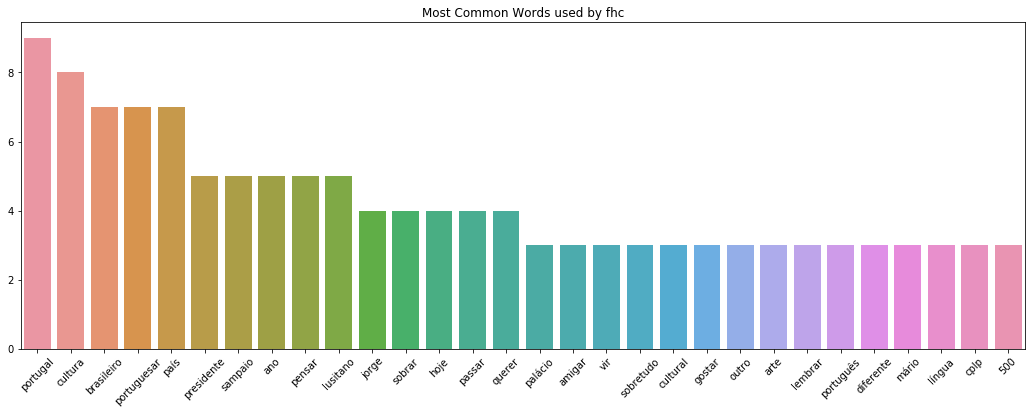

In [89]:
get_word_frequency('fhc')

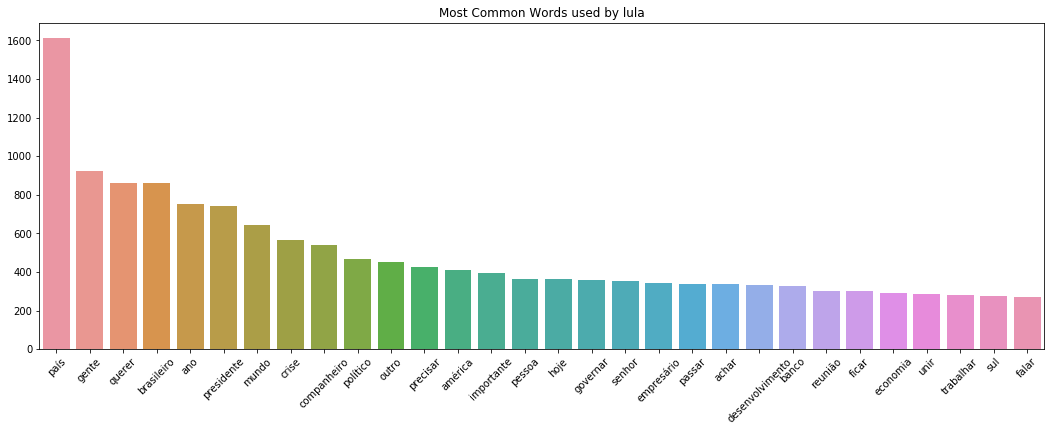

In [90]:
get_word_frequency('lula')

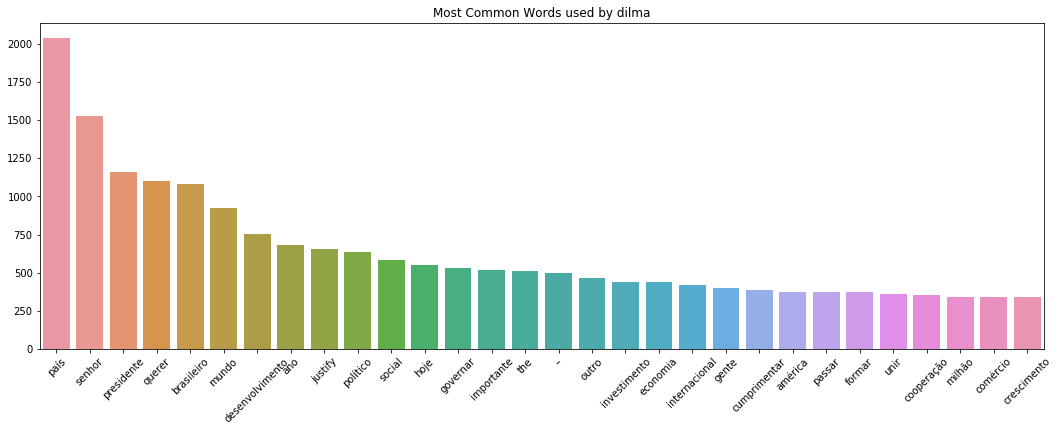

In [91]:
get_word_frequency('dilma')

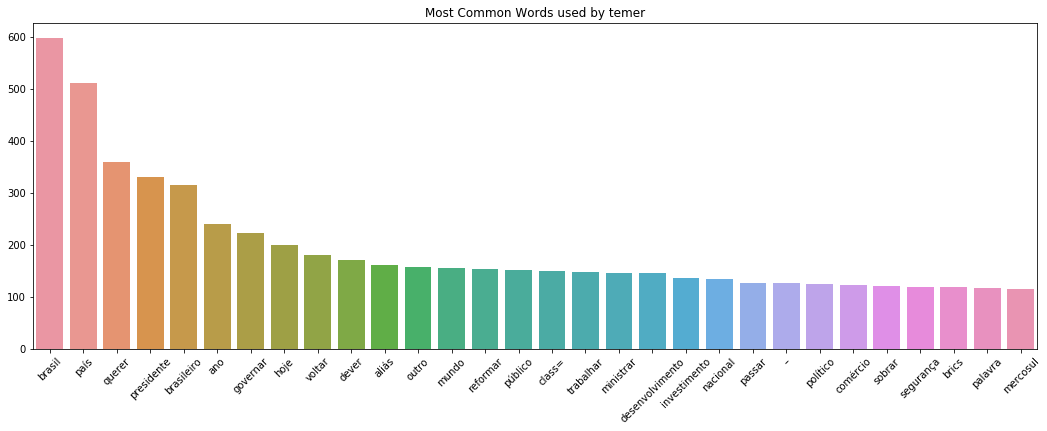

In [92]:
get_word_frequency('temer')

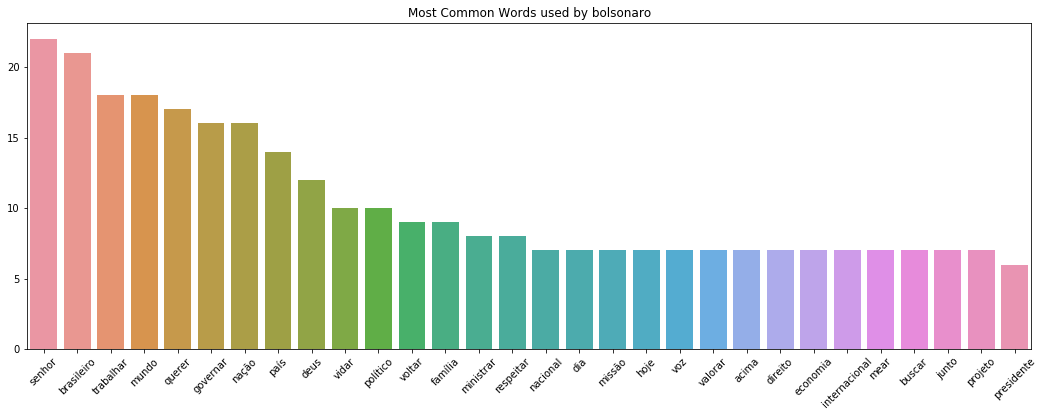

In [93]:
get_word_frequency('bolsonaro')

In [99]:
# Word cloud with most common words
def show_wordcloud(text, president):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stoplist, background_color="white").generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(25,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {president}', fontsize=20)
    plt.axis("off")
    plt.show()
    fig.savefig(f'word_cloud_{president}.png', format='png', dpi=500)
    
def get_wordcloud(df, president):
    dataframe = df[df['president'] == president]
    # Get all texts and generate a cloud
    text = " ".join(review for review in dataframe.text_processed)
    show_wordcloud(text, president) 

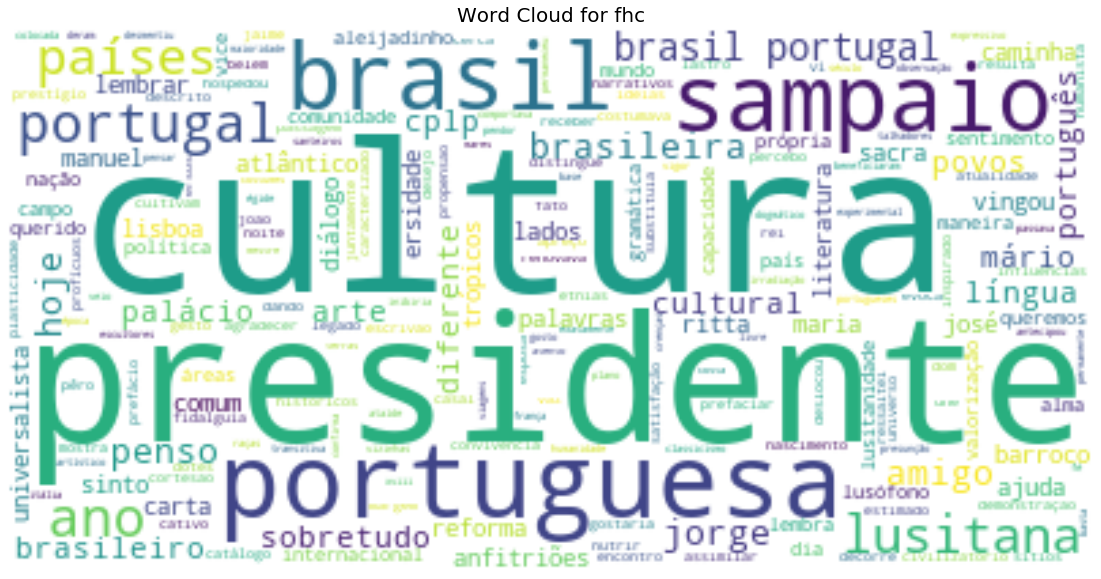

In [100]:
get_wordcloud(df_speech_consolidated, 'fhc')

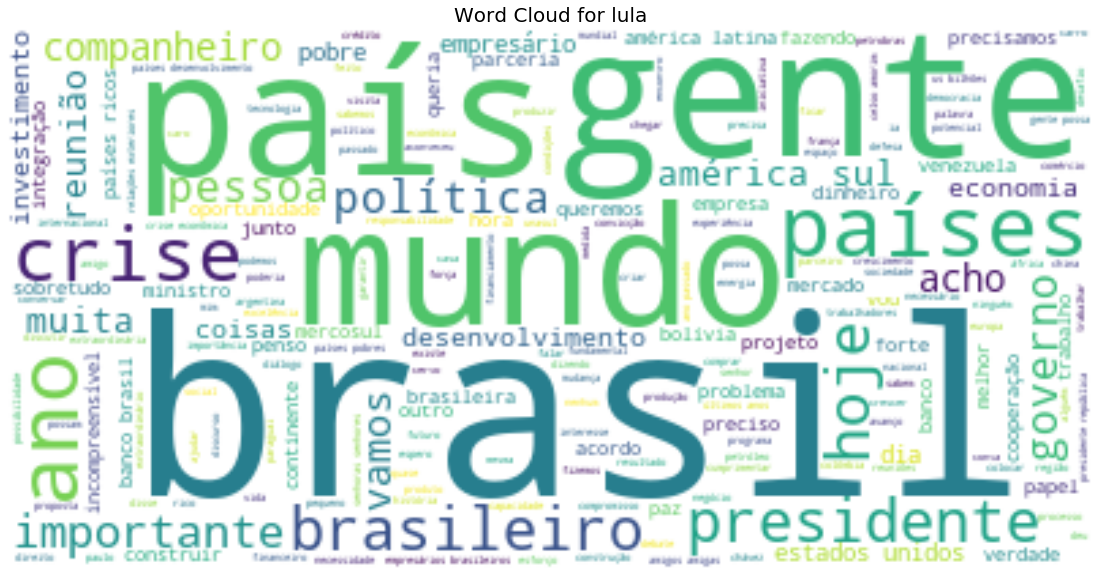

In [101]:
get_wordcloud(df_speech_consolidated, 'lula')

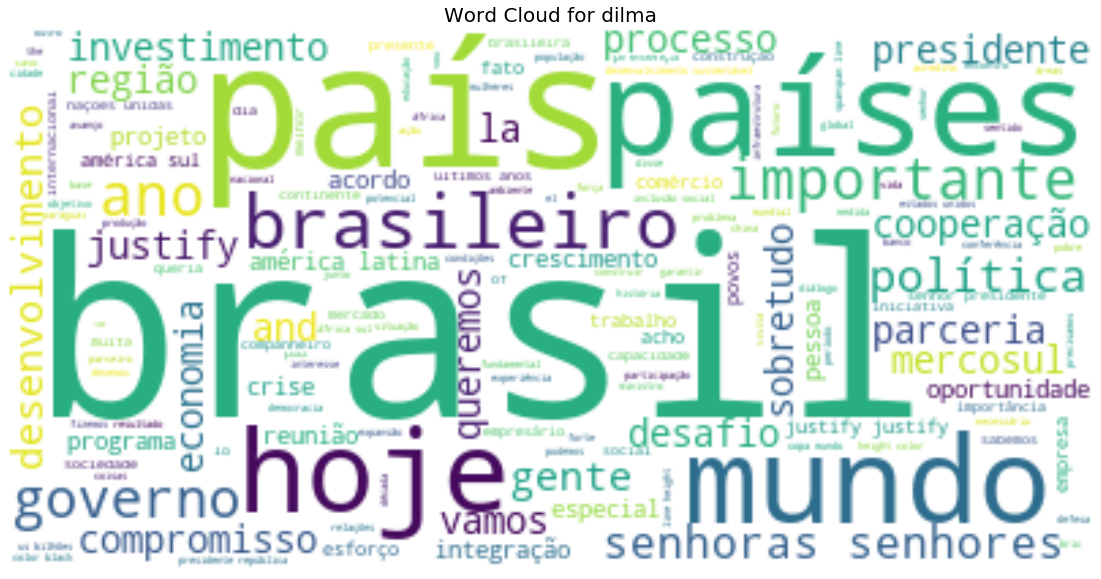

In [102]:
get_wordcloud(df_speech_consolidated, 'dilma')

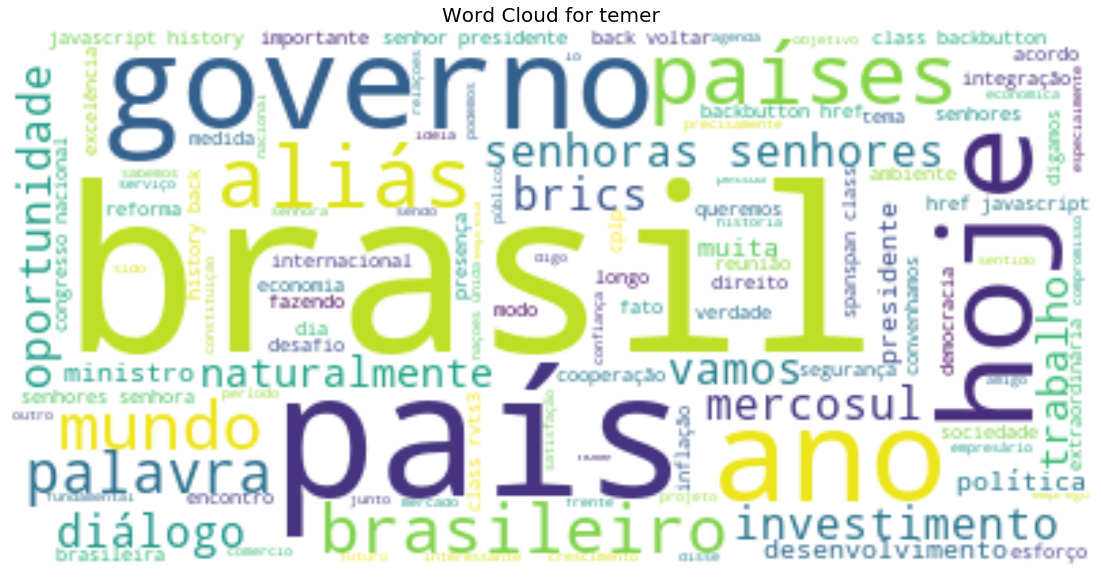

In [103]:
get_wordcloud(df_speech_consolidated, 'temer')

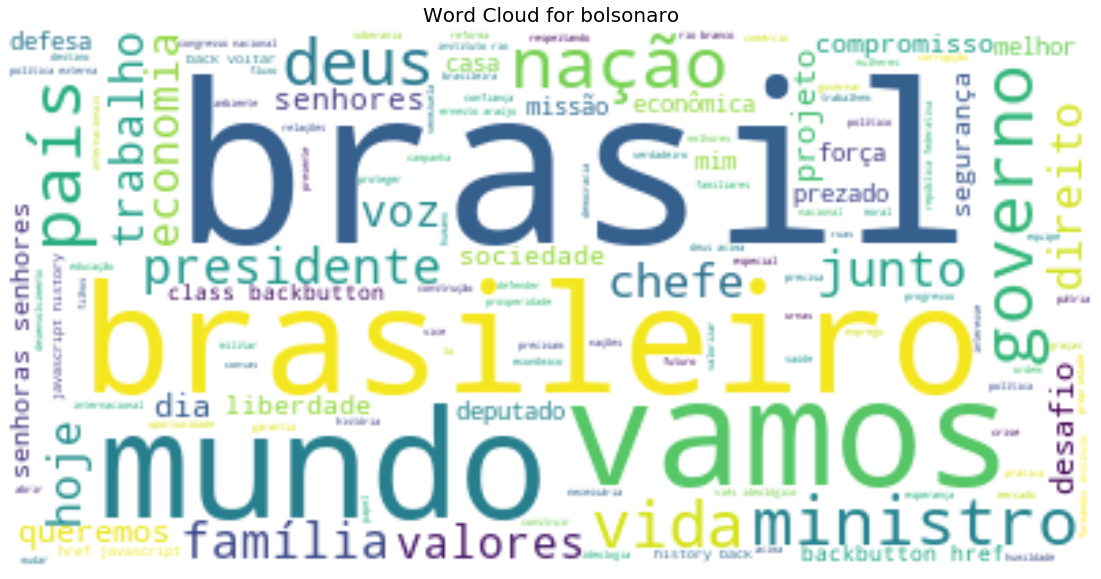

In [104]:
get_wordcloud(df_speech_consolidated, 'bolsonaro')

In [105]:
def get_lexical_diversity(df, president):
    dataframe = df[df['president'] == president]

    # Word stats
    full_text_count = pd.DataFrame(Counter(" ".join(dataframe["text_processed"]).split()), index=[0])
    full_text_count = full_text_count.T
    full_text_count = full_text_count.reset_index()
    full_text_count.columns = ['word', 'qty']

    # Distinct words to include in numerator
    distinct_words = set()
    dataframe['text_processed'].str.lower().str.split().apply(distinct_words.update)
    total_distinct_words = len(distinct_words)

    # All words to include in denominator
    total_words = full_text_count['qty'].sum()

    lexical_diversity = round((total_distinct_words / total_words),2)

    print(f'Lexical Diversity for {president}: {lexical_diversity}')

In [106]:
get_lexical_diversity(df_speech_consolidated, 'fhc')

Lexical Diversity for fhc: 0.79


In [107]:
get_lexical_diversity(df_speech_consolidated, 'lula')

Lexical Diversity for lula: 0.12


In [108]:
get_lexical_diversity(df_speech_consolidated, 'dilma')

Lexical Diversity for dilma: 0.12


In [109]:
get_lexical_diversity(df_speech_consolidated, 'temer')

Lexical Diversity for temer: 0.18


In [110]:
get_lexical_diversity(df_speech_consolidated, 'bolsonaro')

Lexical Diversity for bolsonaro: 0.58


In [112]:
def get_word_ngrams_list(df, president, word_ngram):

    def get_top_word_n_bigram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(word_ngram, word_ngram)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]


    common_words = get_top_word_n_bigram(df[df['president'] == president]['text_processed'], 20)
    df3 = pd.DataFrame(common_words, columns = ['ngram' , 'qty'])

    return df3

In [113]:
get_word_ngrams_list(df_speech_consolidated, 'fhc', 2)

,ngram,qty
0,brasil portugal,5
1,jorge sampaio,3
2,500 anos,3
3,presidente jorge,2
4,palácio ajuda,2
5,presidente sampaio,2
6,lados atlântico,2
7,contra reforma,2
8,brasileira portuguesa,2
9,língua portuguesa,2


In [114]:
get_word_ngrams_list(df_speech_consolidated, 'lula', 2)

,ngram,qty
0,américa sul,219
1,estados unidos,195
2,américa latina,164
3,todo mundo,107
4,países ricos,106
5,banco brasil,104
6,cada vez,102
7,empresários brasileiros,95
8,muitas vezes,91
9,gente possa,87


In [115]:
get_word_ngrams_list(df_speech_consolidated, 'dilma', 2)

,ngram,qty
0,senhoras senhores,344
1,américa latina,190
2,justify justify,174
3,américa sul,169
4,senhor presidente,154
5,nações unidas,153
6,cada vez,144
7,presidente república,129
8,estados unidos,128
9,inclusão social,116


In [116]:
get_word_ngrams_list(df_speech_consolidated, 'temer', 2)

,ngram,qty
0,senhoras senhores,106
1,senhor presidente,81
2,class backbutton,77
3,backbutton href,77
4,href javascript,77
5,javascript history,77
6,history back,77
7,back voltar,77
8,senhores senhoras,73
9,spanspan class,68


In [117]:
get_word_ngrams_list(df_speech_consolidated, 'bolsonaro', 2)

,ngram,qty
0,senhoras senhores,6
1,class backbutton,5
2,backbutton href,5
3,href javascript,5
4,javascript history,5
5,history back,5
6,back voltar,5
7,povo brasileiro,4
8,acima tudo,4
9,deus acima,4


In [118]:
get_word_ngrams_list(df_speech_consolidated, 'fhc', 3)

,ngram,qty
0,presidente jorge sampaio,2
1,desejo antes tudo,1
2,antes tudo agradecer,1
3,tudo agradecer presidente,1
4,agradecer presidente jorge,1
5,jorge sampaio esposa,1
6,sampaio esposa maria,1
7,esposa maria josé,1
8,maria josé ritta,1
9,josé ritta gesto,1


In [119]:
get_word_ngrams_list(df_speech_consolidated, 'lula', 3)

,ngram,qty
0,ministro relações exteriores,42
1,américa latina caribe,42
2,celso amorim ministro,25
3,países américa sul,25
4,gases efeito estufa,23
5,amorim ministro relações,22
6,embaixador celso amorim,18
7,todo mundo sabe,16
8,empresários brasileiros empresários,16
9,áfrica américa sul,16


In [120]:
get_word_ngrams_list(df_speech_consolidated, 'dilma', 3)

,ngram,qty
0,line height 150,94
1,height 150 color,93
2,150 color black,93
3,spanspan line height,92
4,américa latina caribe,61
5,chefes estado governo,58
6,jornalistas fotógrafos cinegrafistas,44
7,class backbutton href,41
8,backbutton href javascript,41
9,href javascript history,41


In [121]:
get_word_ngrams_list(df_speech_consolidated, 'temer', 3)

,ngram,qty
0,class backbutton href,77
1,backbutton href javascript,77
2,href javascript history,77
3,javascript history back,77
4,history back voltar,77
5,spanspan class rvts3,49
6,obrigado class backbutton,41
7,presidente xi jinping,19
8,spanspan class rvts4,18
9,governador geraldo alckmin,17


In [122]:
get_word_ngrams_list(df_speech_consolidated, 'bolsonaro', 3)

,ngram,qty
0,class backbutton href,5
1,backbutton href javascript,5
2,href javascript history,5
3,javascript history back,5
4,history back voltar,5
5,república federativa brasil,3
6,brasil acima tudo,3
7,acima tudo deus,3
8,tudo deus acima,3
9,deus acima todos,3


In [125]:
# LDA Analysis dataframes
df_speech_consolidated_fhc = df_speech_consolidated[df_speech_consolidated['president'] == 'fhc']

df_speech_consolidated_lula = df_speech_consolidated[df_speech_consolidated['president'] == 'lula']

df_speech_consolidated_dilma = df_speech_consolidated[df_speech_consolidated['president'] == 'dilma']

df_speech_consolidated_temer = df_speech_consolidated[df_speech_consolidated['president'] == 'temer']

df_speech_consolidated_bolsonaro = df_speech_consolidated[df_speech_consolidated['president'] == 'bolsonaro']

In [135]:
def get_topics(df, n_components, number_words):
    
    # Convert to list
    data = df.text_processed.values.tolist()

    # Remove special characters
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]

    vectorizer = CountVectorizer(analyzer='word',       
                                 #min_df=10,
                                 stop_words=stoplist,
                                 lowercase=True,
                                 token_pattern='[a-zA-Z0-9]{3,}',
                                )

    data_vectorized = vectorizer.fit_transform(data)

    # Materialize the sparse data
    data_dense = data_vectorized.todense()

    # Compute Sparsicity = Percentage of Non-Zero cells
    print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

    # Build LDA Model
    lda_model = LatentDirichletAllocation(n_components=n_components,
                                          max_iter=10,
                                          learning_method='online',
                                          random_state=42,
                                          batch_size=10,
                                          evaluate_every = -1,
                                          n_jobs =1,
                                         )
    lda_output = lda_model.fit_transform(data_vectorized)

    # Helper function
    def print_topics(model, count_vectorizer, n_top_words):
        words = count_vectorizer.get_feature_names()
        for topic_idx, topic in enumerate(model.components_):
            print("\nTopic #%d:" % topic_idx)
            print(" ".join([words[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]]))

    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    lda_model.fit(data_vectorized)

    print_topics(lda_model, vectorizer, number_words)
    
    return lda_model, data_vectorized, data, lda_output, vectorizer

<>:7: DeprecationWarning: invalid escape sequence \S
<>:10: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:10: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \S
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-135-a2cf973bd949>:7: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-135-a2cf973bd949>:10: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [140]:
lda_model_fhc, data_vectorized_fhc, data_fhc, lda_output_fhc, vectorizer_fhc = \
    get_topics(df_speech_consolidated_fhc, n_components=10, number_words=10)

Sparsicity:  100.0 %
Topics found via LDA:

Topic #0:
brasil criando portugal prestada presidente culturais parecer gide gico desempenhar

Topic #1:
brasil portugal portuguesa presidente ncia rio lusitana sampaio ses penso

Topic #2:
ses reduzir sampaio ruth estrat programa 1500 gicos salvador inscrito

Topic #3:
contribui universalista sampaio lus ressalto queridos amigo programa pensar reconhecer

Topic #4:
portugal brasileira cio presidente lusitana ncia culturas brasileiro tica atributos

Topic #5:
maria gostamos ricos ncia entrevista manuel cumprir passagem primazia mulheres

Topic #6:
presidente brasil portugal rio ncia ses tica lusitana pria vice

Topic #7:
pendor assinando tamanha produzir nica costa neutralize andrade dotes reconhecer

Topic #8:
pria multiculturalismo inscrito assinando ria cativo stico negociar unido portuguesa

Topic #9:
brasil ncia portugal cultura sampaio comunidade assistidos lusitana cren acompanhem


In [141]:
lda_model_lula, data_vectorized_lula, data_lula, lda_output_lula, vectorizer_lula = \
    get_topics(df_speech_consolidated_lula, n_components=10, number_words=10)

Sparsicity:  3.993421607489247 %
Topics found via LDA:

Topic #0:
turquia sargento portugal istambul jefferson trazemos portugueses ancara correa tenente

Topic #1:
mata nutricional valiosas protegidas promovem ignoram paliativas aquisi sabotam trilhado

Topic #2:
justify class vinicius moraes mercosul bloco oper fidel cercado consular

Topic #3:
sebrae okamotto furlan paulo palestina silvano palestino diretoria manga holocausto

Topic #4:
saudita infra pergunto terremoto monop rei proclamar silencioso venceu caminhou

Topic #5:
ses brasil ncia presidente desenvolvimento pol vel tica rio econ

Topic #6:
brasil gente ses mundo ncia rio rios crise anos presidente

Topic #7:
pinguelli iludo ibama dend socialista marginal chuvas sainte enchente suzana

Topic #8:
mario don peruanos cruzeiro inferioridade cri tom representando vizinha perceberem

Topic #9:
mauricio maur benjamin netto virarem competidores millones brasil pensou perturba


In [142]:
lda_model_dilma, data_vectorized_dilma, data_dilma, lda_output_dilma, vectorizer_dilma = \
    get_topics(df_speech_consolidated_dilma, n_components=10, number_words=10)

Sparsicity:  2.791602361871397 %
Topics found via LDA:

Topic #0:
gente brasil mundo ent acho vou empres companheiro vamos companheiros

Topic #1:
park coreana rgica felicitei fraternos filtro coreano geun pec piracicaba

Topic #2:
pol rio mundo ncia tica vel internacional ria seguran governo

Topic #3:
bano tour sleiman assad hariri beirute bibendum michelin teer ahmadinejad

Topic #4:
the and los our will that con del this which

Topic #5:
arm biden cam armando ditos cavaco escritores monteiro docentes joe

Topic #6:
lib roger strongpresidente camisa berlusconi bnb inadimpl louco trabalharem 262

Topic #7:
coreanos park geun hye coreanas coreana alfabeto colega darem atraiu

Topic #8:
online offline humaniza oab condutas google contemplou ofensivas twitter deveres

Topic #9:
brasil ncia ses presidente rio desenvolvimento justify vel hoje rela


In [143]:
lda_model_temer, data_vectorized_temer, data_temer, lda_output_temer, vectorizer_temer = \
    get_topics(df_speech_consolidated_temer, n_components=10, number_words=10)

Sparsicity:  4.776124427686507 %
Topics found via LDA:

Topic #0:
ncia senhores brasil mundo rio pol desenvolvimento ambiente presidente senhor

Topic #1:
mente quantas olimp sobreviventes ditas cora passava adas pedir confraterniza

Topic #2:
saneamento drica brics desenvolvimento dricos dignit ncia transposi banco presidente

Topic #3:
spanspan rvts3 class rvts4 embaixadora span territ amazonas marielle bar

Topic #4:
brasil senhores ncia pol vel tica rio mundo vamos sociedade

Topic #5:
brasil senhores ncia tica rcio rio pol governo vel mundo

Topic #6:
saneamento drica transposi senegal dignit dricos fecharmos falhar sustent protegeremos

Topic #7:
brics desenvolvimento ncia vel presidente ses senhor rcio solu internacional

Topic #8:
mbia col colombianos amigos prefeito medell chapec buligon solidariedade deram

Topic #9:
brasil senhores ncia presidente rio ria governo hoje senhoras ministro


In [144]:
lda_model_bolsonaro, data_vectorized_bolsonaro, data_bolsonaro, lda_output_bolsonaro, vectorizer_bolsonaro = \
    get_topics(df_speech_consolidated_bolsonaro, n_components=10, number_words=10)

Sparsicity:  26.524685382381413 %
Topics found via LDA:

Topic #0:
brasil mundo vamos deus ria governo fam dia queremos ncia

Topic #1:
brasil nacional deus senhores senhoras miss chefes brasileiros pol presidente

Topic #2:
brasil brasileiros padovan acredito secret preservou munic voz miss rio

Topic #3:
brasil liberdade voz pol tica promovidas desafios trabalho prezado bras

Topic #4:
mulheres margin auto diariamente women src width combater acreditamos jpg

Topic #5:
problemas alheios negras passo decisivos contas presidentes oadas escolhido xito

Topic #6:
supremo nacional dodge jos diretriz incansavelmente crescimento aproveito oposto diplomatas

Topic #7:
brasil projeto senhores mundo rio voz ernesto ministro branco venezuela

Topic #8:
michelle brasil rios ordem desafios display defende deus fam raquel

Topic #9:
brasil vamos deus mundo econ fam presidente queremos ncia ticas


In [145]:
def get_topic_per_document(lda_model, data_vectorized, data, lda_output):
    # Create Document - Topic Matrix
    lda_output = lda_model.transform(data_vectorized)

    # column names
    topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

    # index names
    docnames = ["Doc" + str(i) for i in range(len(data))]

    # Make the pandas dataframe
    df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

    # Get dominant topic for each document
    dominant_topic = np.argmax(df_document_topic.values, axis=1)
    df_document_topic['dominant_topic'] = dominant_topic

    # Styling
    def color_green(val):
        color = 'green' if val > .1 else 'black'
        return 'color: {col}'.format(col=color)

    def make_bold(val):
        weight = 700 if val > .1 else 400
        return 'font-weight: {weight}'.format(weight=weight)

    # Apply Style
    df_document_topics_styled = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
    
    return df_document_topics_styled, df_document_topic

In [146]:
df_topic_per_document_lula_styled, df_topic_per_document_lula = \
    get_topic_per_document(lda_model_lula,
                           data_vectorized_lula,
                           data_lula,
                           lda_output_lula)
df_topic_per_document_lula_styled

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0.15,0,0.08,0.77,0,0,0,6
Doc1,0,0,0,0,0,1,0,0,0,0,5
Doc2,0,0,0,0,0,0,1,0,0,0,6
Doc3,0,0,0,0,0,0.95,0.05,0,0,0,5
Doc4,0.25,0,0,0,0,0.38,0.37,0,0,0,5
Doc5,0,0,0,0.18,0,0.69,0.13,0,0,0,5
Doc6,0,0,0.33,0,0,0.44,0.23,0,0,0,5
Doc7,0,0,0,0,0,0.75,0.25,0,0,0,5
Doc8,0,0.07,0,0,0,0.69,0.24,0,0,0,5
Doc9,0,0,0,0,0,0.31,0.69,0,0,0,6


In [147]:
df_topic_per_document_dilma_styled, df_topic_per_document_dilma = \
    get_topic_per_document(lda_model_dilma,
                           data_vectorized_dilma,
                           data_dilma,
                           lda_output_dilma)
df_topic_per_document_dilma_styled

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0,0,0,0,0,1,9
Doc1,0,0,0.02,0,0,0.08,0,0,0,0.89,9
Doc2,0.64,0,0,0,0,0,0,0,0,0.36,0
Doc3,0,0,0.49,0,0,0,0,0,0,0.51,9
Doc4,0,0,0,0,0,0.06,0,0,0,0.94,9
Doc5,0,0,0.01,0,0,0,0.03,0,0,0.96,9
Doc6,0,0,0,0,0,0,0,0,0,1,9
Doc7,0,0,0.5,0,0,0,0,0,0,0.49,2
Doc8,0.17,0,0,0,0,0,0,0,0,0.83,9
Doc9,0,0,0.02,0,0.04,0,0,0,0,0.93,9


In [148]:
df_topic_per_document_temer_styled, df_topic_per_document_temer = \
    get_topic_per_document(lda_model_temer,
                           data_vectorized_temer,
                           data_temer,
                           lda_output_temer)
df_topic_per_document_temer_styled

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0,0,0,0,0.26,0.74,9
Doc1,0,0.33,0,0,0,0,0,0,0,0.67,9
Doc2,0,0,0,0,0,0,0,0,0,1,9
Doc3,0,0,0,0,0,0,0.09,0.47,0,0.44,7
Doc4,0,0,0,0,0,0,0,0.71,0,0.29,7
Doc5,0,0,0,0,0,0,0,0,0,1,9
Doc6,0,0,0,0,0,0,0,0.34,0.2,0.45,9
Doc7,0,0,0,0,0,0,0,0.32,0.19,0.49,9
Doc8,0,0,0,0,0,0,0,0,0,1,9
Doc9,0,0,0,0,0,0,0,0,0,1,9


In [149]:
def get_topic_distribution(df_document_topic):
    df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
    df_topic_distribution.columns = ['Topic Num', 'Num Documents']
    total_docs = df_topic_distribution['Num Documents'].sum()
    df_topic_distribution['perc_per_topic'] = np.round(((df_topic_distribution['Num Documents'] /total_docs) * 100), 2)

    return df_topic_distribution

In [150]:
get_topic_distribution(df_topic_per_document_lula)

,Topic Num,Num Documents,perc_per_topic
0,6,69,56.56
1,5,53,43.44


In [151]:
get_topic_distribution(df_topic_per_document_dilma)

,Topic Num,Num Documents,perc_per_topic
0,9,172,90.05
1,2,10,5.24
2,0,7,3.66
3,4,2,1.05


In [152]:
get_topic_distribution(df_topic_per_document_temer)

,Topic Num,Num Documents,perc_per_topic
0,9,66,83.54
1,7,12,15.19
2,8,1,1.27


In [153]:
def get_lda_plot(lda_model, data_vectorized, vectorizer):
    pyLDAvis.enable_notebook()
    panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
    return panel

In [ ]:
get_lda_plot(lda_model_lula, data_vectorized_lula, vectorizer_lula)

In [ ]:
get_lda_plot(lda_model_dilma, data_vectorized_dilma, vectorizer_dilma)

In [ ]:
get_lda_plot(lda_model_temer, data_vectorized_temer, vectorizer_temer)

In [ ]:
def get_topic_distribution(df_document_topic):
    df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
    df_topic_distribution.columns = ['Topic Num', 'Num Documents']
    total_docs = df_topic_distribution['Num Documents'].sum()
    df_topic_distribution['perc_per_topic'] = np.round(((df_topic_distribution['Num Documents'] /total_docs) * 100), 2)

    return df_topic_distribution